The following notebook contains the code for training lstm based model for eeg data
<br><br>
0: Lie (93 instances) <br>
1: truth (108 instances) <br>
Seq len: 20

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
SEQ_LEN = 20
SEED_VAL = 0

# Importing libraries

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import os
import tensorflow as tf
import keras

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.optimizers import Adam
from keras.layers import *
from keras.callbacks import EarlyStopping

# Loading datasets

In [156]:
FEATURES_PATH = "/content/drive/MyDrive/CDAC-Project(Personal)/numpy-arrays/EEG/eeg_features({}).npz".format(SEQ_LEN)
LABELS_PATH = "/content/drive/MyDrive/CDAC-Project(Personal)/numpy-arrays/EEG/eeg_labels({}).npz".format(SEQ_LEN)

In [157]:
lstm_features = np.load(FEATURES_PATH)["arr_0"]
lstm_labels = np.load(LABELS_PATH)["arr_0"]

In [158]:
print("Features: {}\nLabels: {}".format(lstm_features.shape, lstm_labels.shape))

Features: (201, 20, 28)
Labels: (201,)


In [159]:
lstm_features[np.isnan(lstm_features)] = 0

## Train test split

In [160]:
features_train, features_test, labels_train, labels_test = train_test_split(lstm_features, lstm_labels, test_size=0.25, 
                                                                            random_state=SEED_VAL)

In [161]:
print("Shapes\nTrain:\nFeatures: {}, labels: {}\n\nTest:\nFeatures:{}, labels: {}".format(
    features_train.shape, labels_train.shape, features_test.shape, labels_test.shape
))

Shapes
Train:
Features: (150, 20, 28), labels: (150,)

Test:
Features:(51, 20, 28), labels: (51,)


# Model

## Callbacks

In [162]:
LSTM_SAVED_MODEL_PATH = "/content/drive/MyDrive/CDAC-Project(Personal)/saved-models/EEG/eeg-lstm({})".format(SEQ_LEN)

lstm_cbk1 = tf.keras.callbacks.ModelCheckpoint(filepath=LSTM_SAVED_MODEL_PATH,
                                               save_weights_only=False,
                                               monitor="val_loss",
                                               mode="min",
                                               verbose=1,
                                               save_best_only=True)


lstm_cbk2 = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                             patience=25,
                                             verbose=1,
                                             mode="min")

## Building model

In [163]:
def create_lstm_model() :               
    model = Sequential()
    model.add(LSTM(256, return_sequences=True, input_shape=(SEQ_LEN, lstm_features.shape[2])))
    model.add(LSTM(8, return_sequences=False))
    model.add(Dense(1, activation="sigmoid"))


    opt = Adam(learning_rate=0.0001)

    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

    return model

In [164]:
lstm_model = create_lstm_model()

In [165]:
lstm_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 20, 256)           291840    
                                                                 
 lstm_22 (LSTM)              (None, 8)                 8480      
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 300,329
Trainable params: 300,329
Non-trainable params: 0
_________________________________________________________________


## Training

In [166]:
lstm_history = lstm_model.fit(features_train, labels_train, epochs=100, validation_split=0.2, shuffle=True, callbacks=[lstm_cbk1, lstm_cbk2]) 

Epoch 1/100
4/4 [==============================] - ETA: 0s - loss: 0.6926 - accuracy: 0.5500
Epoch 1: val_loss improved from inf to 0.70583, saving model to /content/drive/MyDrive/CDAC-Project(Personal)/saved-models/EEG/eeg-lstm(20)


4/4 [==============================] - 24s 4s/step - loss: 0.6926 - accuracy: 0.5500 - val_loss: 0.7058 - val_accuracy: 0.4667
Epoch 2/100
4/4 [==============================] - ETA: 0s - loss: 0.6885 - accuracy: 0.5500
Epoch 2: val_loss improved from 0.70583 to 0.70452, saving model to /content/drive/MyDrive/CDAC-Project(Personal)/saved-models/EEG/eeg-lstm(20)


4/4 [==============================] - 10s 3s/step - loss: 0.6885 - accuracy: 0.5500 - val_loss: 0.7045 - val_accuracy: 0.4667
Epoch 3/100
4/4 [==============================] - ETA: 0s - loss: 0.6871 - accuracy: 0.5500
Epoch 3: val_loss did not improve from 0.70452
4/4 [==============================] - 0s 104ms/step - loss: 0.6871 - accuracy: 0.5500 - val_loss: 0.7090 - val_accuracy: 0.4667
Epoch 4/100
4/4 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.5500
Epoch 4: val_loss did not improve from 0.70452
4/4 [==============================] - 0s 108ms/step - loss: 0.6858 - accuracy: 0.5500 - val_loss: 0.7066 - val_accuracy: 0.4667
Epoch 5/100
4/4 [==============================] - ETA: 0s - loss: 0.6841 - accuracy: 0.5500
Epoch 5: val_loss improved from 0.70452 to 0.70398, saving model to /content/drive/MyDrive/CDAC-Project(Personal)/saved-models/EEG/eeg-lstm(20)


4/4 [==============================] - 11s 3s/step - loss: 0.6841 - accuracy: 0.5500 - val_loss: 0.7040 - val_accuracy: 0.4667
Epoch 6/100
4/4 [==============================] - ETA: 0s - loss: 0.6825 - accuracy: 0.5500
Epoch 6: val_loss did not improve from 0.70398
4/4 [==============================] - 0s 107ms/step - loss: 0.6825 - accuracy: 0.5500 - val_loss: 0.7052 - val_accuracy: 0.4667
Epoch 7/100
4/4 [==============================] - ETA: 0s - loss: 0.6821 - accuracy: 0.5583
Epoch 7: val_loss improved from 0.70398 to 0.70376, saving model to /content/drive/MyDrive/CDAC-Project(Personal)/saved-models/EEG/eeg-lstm(20)


4/4 [==============================] - 10s 3s/step - loss: 0.6821 - accuracy: 0.5583 - val_loss: 0.7038 - val_accuracy: 0.5000
Epoch 8/100
4/4 [==============================] - ETA: 0s - loss: 0.6790 - accuracy: 0.5583
Epoch 8: val_loss did not improve from 0.70376
4/4 [==============================] - 0s 102ms/step - loss: 0.6790 - accuracy: 0.5583 - val_loss: 0.7056 - val_accuracy: 0.5000
Epoch 9/100
4/4 [==============================] - ETA: 0s - loss: 0.6794 - accuracy: 0.5500
Epoch 9: val_loss did not improve from 0.70376
4/4 [==============================] - 0s 103ms/step - loss: 0.6794 - accuracy: 0.5500 - val_loss: 0.7089 - val_accuracy: 0.5000
Epoch 10/100
4/4 [==============================] - ETA: 0s - loss: 0.6768 - accuracy: 0.5667
Epoch 10: val_loss did not improve from 0.70376
4/4 [==============================] - 0s 110ms/step - loss: 0.6768 - accuracy: 0.5667 - val_loss: 0.7053 - val_accuracy: 0.5000
Epoch 11/100
4/4 [==============================] - ETA: 0s - lo

4/4 [==============================] - 10s 3s/step - loss: 0.6703 - accuracy: 0.5917 - val_loss: 0.7020 - val_accuracy: 0.4000
Epoch 14/100
4/4 [==============================] - ETA: 0s - loss: 0.6675 - accuracy: 0.6167
Epoch 14: val_loss improved from 0.70204 to 0.70187, saving model to /content/drive/MyDrive/CDAC-Project(Personal)/saved-models/EEG/eeg-lstm(20)


4/4 [==============================] - 10s 3s/step - loss: 0.6675 - accuracy: 0.6167 - val_loss: 0.7019 - val_accuracy: 0.4000
Epoch 15/100
4/4 [==============================] - ETA: 0s - loss: 0.6646 - accuracy: 0.6167
Epoch 15: val_loss did not improve from 0.70187
4/4 [==============================] - 0s 103ms/step - loss: 0.6646 - accuracy: 0.6167 - val_loss: 0.7035 - val_accuracy: 0.4333
Epoch 16/100
4/4 [==============================] - ETA: 0s - loss: 0.6609 - accuracy: 0.6333
Epoch 16: val_loss improved from 0.70187 to 0.70009, saving model to /content/drive/MyDrive/CDAC-Project(Personal)/saved-models/EEG/eeg-lstm(20)


4/4 [==============================] - 9s 3s/step - loss: 0.6609 - accuracy: 0.6333 - val_loss: 0.7001 - val_accuracy: 0.4333
Epoch 17/100
4/4 [==============================] - ETA: 0s - loss: 0.6566 - accuracy: 0.6250
Epoch 17: val_loss did not improve from 0.70009
4/4 [==============================] - 0s 107ms/step - loss: 0.6566 - accuracy: 0.6250 - val_loss: 0.7007 - val_accuracy: 0.4667
Epoch 18/100
4/4 [==============================] - ETA: 0s - loss: 0.6521 - accuracy: 0.6417
Epoch 18: val_loss did not improve from 0.70009
4/4 [==============================] - 0s 109ms/step - loss: 0.6521 - accuracy: 0.6417 - val_loss: 0.7032 - val_accuracy: 0.4667
Epoch 19/100
4/4 [==============================] - ETA: 0s - loss: 0.6492 - accuracy: 0.6417
Epoch 19: val_loss improved from 0.70009 to 0.69505, saving model to /content/drive/MyDrive/CDAC-Project(Personal)/saved-models/EEG/eeg-lstm(20)


4/4 [==============================] - 11s 4s/step - loss: 0.6492 - accuracy: 0.6417 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 20/100
4/4 [==============================] - ETA: 0s - loss: 0.6438 - accuracy: 0.6333
Epoch 20: val_loss did not improve from 0.69505
4/4 [==============================] - 0s 102ms/step - loss: 0.6438 - accuracy: 0.6333 - val_loss: 0.7027 - val_accuracy: 0.4667
Epoch 21/100
4/4 [==============================] - ETA: 0s - loss: 0.6324 - accuracy: 0.6667
Epoch 21: val_loss improved from 0.69505 to 0.69439, saving model to /content/drive/MyDrive/CDAC-Project(Personal)/saved-models/EEG/eeg-lstm(20)


4/4 [==============================] - 12s 4s/step - loss: 0.6324 - accuracy: 0.6667 - val_loss: 0.6944 - val_accuracy: 0.4667
Epoch 22/100
4/4 [==============================] - ETA: 0s - loss: 0.6277 - accuracy: 0.6917
Epoch 22: val_loss improved from 0.69439 to 0.68902, saving model to /content/drive/MyDrive/CDAC-Project(Personal)/saved-models/EEG/eeg-lstm(20)


4/4 [==============================] - 10s 3s/step - loss: 0.6277 - accuracy: 0.6917 - val_loss: 0.6890 - val_accuracy: 0.5000
Epoch 23/100
4/4 [==============================] - ETA: 0s - loss: 0.6100 - accuracy: 0.7000
Epoch 23: val_loss did not improve from 0.68902
4/4 [==============================] - 1s 176ms/step - loss: 0.6100 - accuracy: 0.7000 - val_loss: 0.6981 - val_accuracy: 0.5000
Epoch 24/100
4/4 [==============================] - ETA: 0s - loss: 0.6053 - accuracy: 0.7167
Epoch 24: val_loss did not improve from 0.68902
4/4 [==============================] - 0s 112ms/step - loss: 0.6053 - accuracy: 0.7167 - val_loss: 0.6968 - val_accuracy: 0.4667
Epoch 25/100
4/4 [==============================] - ETA: 0s - loss: 0.6085 - accuracy: 0.6917
Epoch 25: val_loss did not improve from 0.68902
4/4 [==============================] - 0s 108ms/step - loss: 0.6085 - accuracy: 0.6917 - val_loss: 0.7016 - val_accuracy: 0.5333
Epoch 26/100
4/4 [==============================] - ETA: 0s 

# Evaluations

## Curves

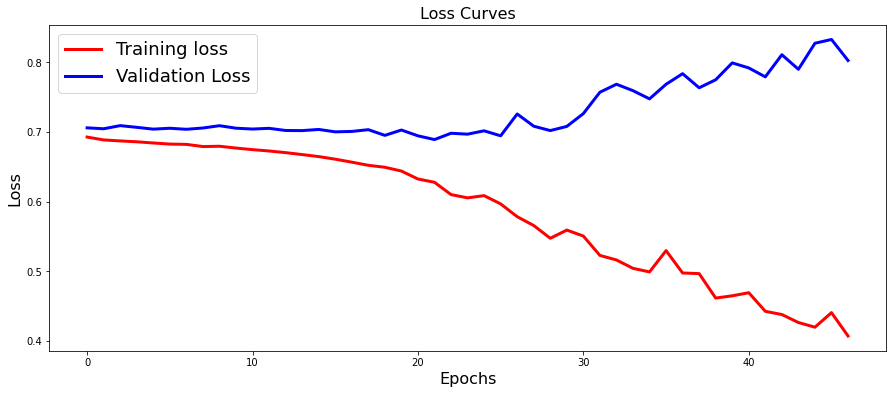

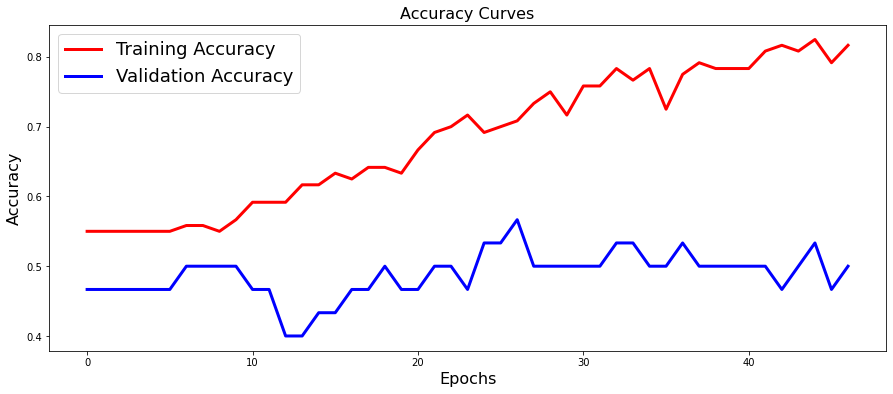

In [167]:
plt.figure(figsize=[15, 6])
plt.plot(lstm_history.history["loss"], "r", linewidth=3.0)
plt.plot(lstm_history.history["val_loss"], "b", linewidth=3.0)
plt.legend(["Training loss", "Validation Loss"], fontsize=18)
plt.xlabel("Epochs", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.title("Loss Curves", fontsize=16)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[15, 6])
plt.plot(lstm_history.history["accuracy"], "r", linewidth=3.0)
plt.plot(lstm_history.history["val_accuracy"], "b", linewidth=3.0)
plt.legend(["Training Accuracy", "Validation Accuracy"], fontsize=18)
plt.xlabel("Epochs", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.title("Accuracy Curves", fontsize=16)   
plt.show()

## Test set

In [168]:
model = load_model(LSTM_SAVED_MODEL_PATH)
model.evaluate(features_test, labels_test)

2/2 [==============================] - 1s 25ms/step - loss: 0.6798 - accuracy: 0.6275


[0.6798161268234253, 0.6274510025978088]

### Confusion matrix

2/2 [==============================] - 1s 21ms/step
              precision    recall  f1-score   support

           0       0.58      0.65      0.61        23
           1       0.68      0.61      0.64        28

    accuracy                           0.63        51
   macro avg       0.63      0.63      0.63        51
weighted avg       0.63      0.63      0.63        51



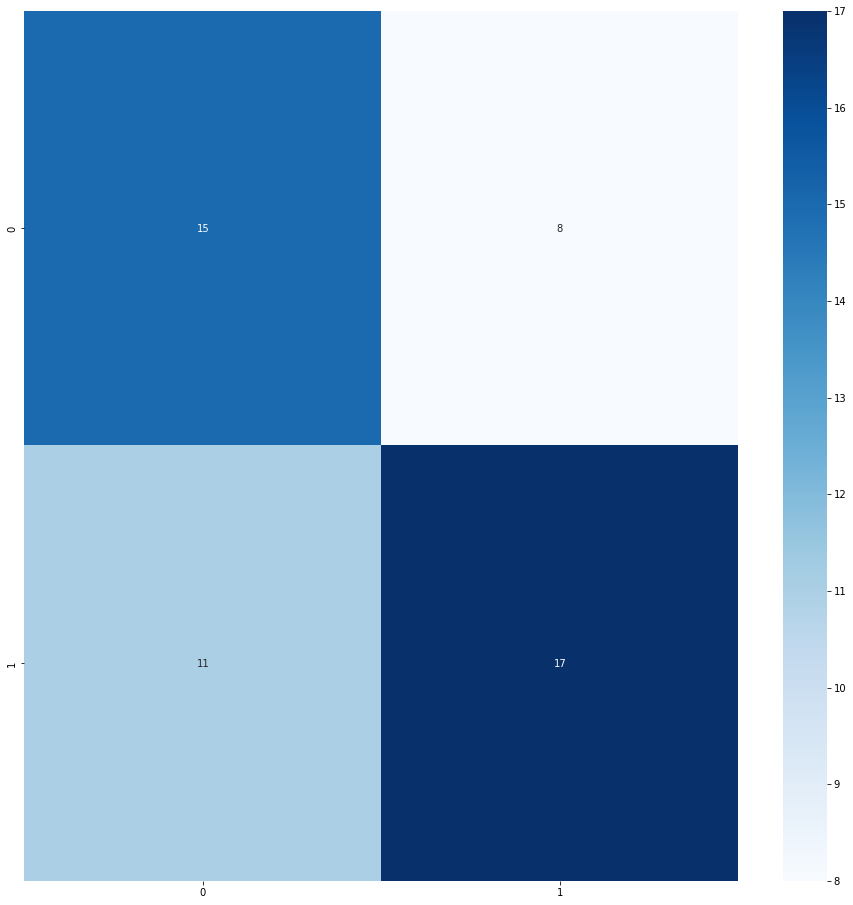

In [169]:
predicted_classes = np.round(model.predict(features_test))
confusionmatrix = confusion_matrix(labels_test, predicted_classes)
plt.figure(figsize=(16, 16))
sns.heatmap(confusionmatrix, cmap="Blues", annot=True, cbar=True)
print(classification_report(labels_test, predicted_classes))

## Original paper results

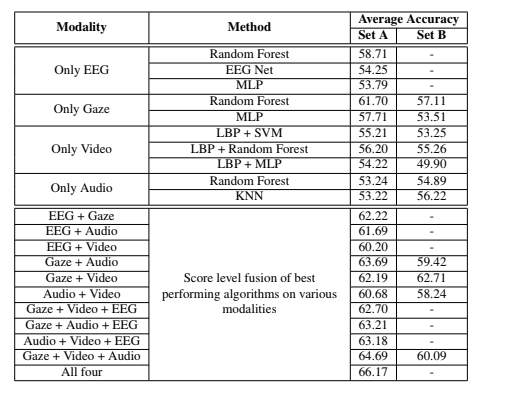

# Extracting features

In [170]:
model = load_model(LSTM_SAVED_MODEL_PATH)

In [171]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 20, 256)           291840    
                                                                 
 lstm_22 (LSTM)              (None, 8)                 8480      
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 300,329
Trainable params: 300,329
Non-trainable params: 0
_________________________________________________________________


In [172]:
model.evaluate(features_test, labels_test)

2/2 [==============================] - 1s 21ms/step - loss: 0.6798 - accuracy: 0.6275


[0.6798161268234253, 0.6274510025978088]

In [174]:
model_outputs = model.get_layer("lstm_22").output
child_model = tf.keras.models.Model(inputs=model.inputs, outputs=model_outputs)

In [175]:
gen_model_output = child_model.predict(lstm_features)

7/7 [==============================] - 3s 47ms/step


In [176]:
gen_model_output.shape

(201, 8)

In [177]:
OUTPUT_SAVE_PATH = "/content/drive/MyDrive/CDAC-Project(Personal)/numpy-arrays/EEG/eeg-lstm({})-generated-output".format(SEQ_LEN)
np.savez_compressed(OUTPUT_SAVE_PATH, gen_model_output)